# Generalities for GANs

* Import libraries
* Run on GPU if possible
* Create data loaders

In [1]:
from __future__ import print_function
import argparse
import torch
import torch.utils.data
from torch import nn, optim
from torch.nn import functional as F
from torchvision import datasets, transforms
from torchvision.utils import save_image
from IPython.display import Image, display
import matplotlib.pyplot as plt

# create directory to save results
!mkdir results

# script parameters
batch_size = 128
log_interval = 100

# run on GPU if possible
cuda = torch.cuda.is_available()
device = torch.device("cuda" if cuda else "cpu")

# create data loaders
kwargs = {'num_workers': 1, 'pin_memory': True} if cuda else {}
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.ToTensor()),
    batch_size=batch_size, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.ToTensor()),
    batch_size=batch_size, shuffle=True, **kwargs)


mkdir: results: File exists


# Neural Network class

* Generator
* Discriminator


In [2]:
# Generator Network
class Generator(nn.Module):

    # declare layers
    def __init__(self):
        super(Generator, self).__init__()

        # dummy assignment until this function is filled in
        self.fc1 = nn.Linear(20, 400)
        self.fc2 = nn.Linear(400, 784)

    # Forward: one ReLU hidden layer of 400 nodes, one Sigmoid output layer of 784 nodes
    def forward(self, z):
        
        z = F.relu(self.fc1(z))
        h3 = self.fc2(z)
        probabilities = torch.sigmoid(h3)

        # dummy assignment until this function is filled in
        #probabilities = torch.rand(z.shape[0],784).to(device)
        return probabilities

# Discriminator Network
class Discriminator(nn.Module):

    # declare layers
    def __init__(self):
        super(Discriminator, self).__init__()

        # dummy assignment until this function is filled in
        self.fc1 = nn.Linear(784, 400)
        self.fc2 = nn.Linear(400, 1)

    # Forward: one ReLU hidden layer of 400 nodes, one Sigmoid output layer of 1 node
    def forward(self, x):

        # dummy assignment until this function is filled in
        #probabilties = torch.rand(x.shape[0],1).to(device)
        x = F.relu(self.fc1(x.view(-1,784)))
        h = self.fc2(x)
        probabilities = torch.sigmoid(h)
        
        return probabilities

# Loss Function

In [3]:


# GAN Loss Function
#
# Inputs:
#    predictions: array of probabilities indicating whether the images are real or fake 
#    targets: array of 1s (real image) and 0s (fake image)
#
# Output:
#    BCE: binary cross entropy (scalar)
#
def gan_loss_function(predictions, targets):

    # dummy assignment until this function is filled in
    #BCE = 0
    BCE = F.binary_cross_entropy(predictions,targets, reduction='sum')
    return BCE

# Training

In [4]:

real_label = 1.
fake_label = 0.

# GAN Training
#
# Have a look at the following tutorial: https://pytorch.org/tutorials/beginner/dcgan_faces_tutorial.html
#
# Inputs:
#    epoch: epoch #
#    generator: generator network
#    generator_optimizer: generator optimizer
#    discriminator: discriminator network
#    discriminator_optimizer: discriminator optimizer
#
# Outputs:
#    average_generator_loss: binary cross entropy (scalar)
#    average_discriminator_loss: binary cross entropy (scalar)
#
def gan_train(epoch, generator, generator_optimizer, discriminator, discriminator_optimizer):
    G_losses = 0
    D_losses = 0
    for batch_idx, (data, _) in enumerate(train_loader):
        data = data.to(device)
        
        discriminator_optimizer.zero_grad()
        
        ############################
        # (1) Update D network: maximize log(D(x)) + log(1 - D(G(z)))
        ###########################
        ## Train with all-real batch
        
        # Format batch
        real_cpu = data[0].to(device)  #torch.size 128 1 28 28
        #print(data.shape,data[0].shape)
        #b_size = 128 #real_cpu.size(0)     #128
       
        
        # Forward pass real batch through D
        output_D = discriminator(data)
        b_size = output_D.size(dim=0)
        #print(b_size)
        label = torch.ones(b_size,1)
        #label = torch.full((b_size,1), real_label, dtype=torch.float, device=device)
        
        #
        #output_D = discriminator(data)
        # Calculate loss on all-real batch
        errD_real = gan_loss_function(output_D, label)
        # Calculate gradients for D in backward pass
        errD_real.backward()
        
        nz = 20
        ## Train with all-fake batch
        # Generate batch of latent vectors
        # nz is the length of the z input vector
        noise = torch.randn(b_size, nz, device=device)
        # Generate fake image batch with G
        fake = generator(noise)#.view(-1))
        label_1 = torch.zeros(b_size,1)#label.fill_(fake_label)
        # Classify all fake batch with D
        output = discriminator(fake.detach())
        # Calculate D's loss on the all-fake batch
        errD_fake = gan_loss_function(output, label_1)
        # Calculate the gradients for this batch, accumulated (summed) with previous gradients
        errD_fake.backward()
        
        # Compute error of D as sum over the fake and the real batches
        errD = errD_real + errD_fake
        # Update D
        discriminator_optimizer.step()
        
        ############################
        # (2) Update G network: maximize log(D(G(z)))
        ###########################
        generator_optimizer.zero_grad()
        noise2 = torch.randn(b_size, nz, device=device)
        fake2 = generator(noise2)#.view(-1))
        label2 = torch.ones(b_size,1) #label.fill_(real_label)  # fake labels are real for generator cost
        # Since we just updated D, perform another forward pass of all-fake batch through D
        output = discriminator(fake2)
        # Calculate G's loss based on this output
        errG = gan_loss_function(output, label2)
        # Calculate gradients for G
        errG.backward()
        # Update G
        generator_optimizer.step()
        
        # Save Losses for plotting later
        G_losses+= errG.item()
        D_losses+= errD.item()


        
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tD Loss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader),
                errD.item() / len(data)))
            
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tG Loss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader),
                errG.item() / len(data)))

    # dummy assignment until this function is filled in
    average_discriminator_loss = D_losses/len(train_loader.dataset)
    average_generator_loss =G_losses/len(train_loader.dataset)
    print('====> Epoch: {} Average loss dis: {:.4f}'.format(
          epoch, average_discriminator_loss))
    print('====> Epoch: {} Average loss gen: {:.4f}'.format(
          epoch, average_generator_loss))
    return average_generator_loss, average_discriminator_loss


# Testing


In [5]:
# GAN Test
#
# Have a look at the following tutorial: https://pytorch.org/tutorials/beginner/dcgan_faces_tutorial.html
#
# Inputs:
#    epoch: epoch #
#    generator: generator network
#    discriminator: discriminator network
#
# Outputs:
#    average_generator_loss: binary cross entropy (scalar)
#    average_discriminator_loss: binary cross entropy (scalar)
#
def gan_test(epoch, generator, discriminator):
    G_losses = 0
    D_losses = 0

    # dummy assignment until this function is filled in
    average_generator_loss = 0
    average_discriminator_loss = 0
    test_loss_D = 0
    test_loss_G = 0
    generator.eval()
    discriminator.eval()
    with torch.no_grad():
        for batch_idx, (data, _) in enumerate(test_loader):
        
            # Forward pass real batch through D
            output_D = discriminator(data)
            b_size = output_D.size(dim=0)
            #print(b_size)
            label = torch.ones(b_size,1)
            #label = torch.full((b_size,1), real_label, dtype=torch.float, device=device)

            errD_real = gan_loss_function(output_D, label)
            # Calculate gradients for D in backward pass


            nz = 20
            ## Train with all-fake batch
            # Generate batch of latent vectors
            # nz is the length of the z input vector
            noise = torch.randn(b_size, nz, device=device)
            # Generate fake image batch with G
            fake = generator(noise)#.view(-1))
            label_1 = torch.zeros(b_size,1)#label.fill_(fake_label)
            # Classify all fake batch with D
            output = discriminator(fake.detach())
            # Calculate D's loss on the all-fake batch
            errD_fake = gan_loss_function(output, label_1)
            # Calculate the gradients for this batch, accumulated (summed) with previous gradients


            # Compute error of D as sum over the fake and the real batches
            errD = errD_real + errD_fake
            # Update D


            ############################
            # (2) Update G network: maximize log(D(G(z)))
            ###########################

            noise2 = torch.randn(b_size, nz, device=device)
            fake2 = generator(noise2)#.view(-1))
            label2 = torch.ones(b_size,1) #label.fill_(real_label)  # fake labels are real for generator cost
            # Since we just updated D, perform another forward pass of all-fake batch through D
            output = discriminator(fake2)
            # Calculate G's loss based on this output
            errG = gan_loss_function(output, label2)
            # Calculate gradients for G

            # Save Losses for plotting later
            G_losses+= errG.item()
            D_losses+= errD.item()

        


        


    # dummy assignment until this function is filled in
    average_discriminator_loss = D_losses/len(test_loader.dataset)
    average_generator_loss =G_losses/len(test_loader.dataset)
    print('====> Epoch: {} Average loss dis: {:.4f}'.format(
          epoch, average_discriminator_loss))
    print('====> Epoch: {} Average loss gen: {:.4f}'.format(
          epoch, average_generator_loss))
    return average_generator_loss, average_discriminator_loss

# Main

Train Epoch: 1 [0/60000 (0%)]	D Loss: 1.359634
Train Epoch: 1 [0/60000 (0%)]	G Loss: 1.695375
Train Epoch: 1 [12800/60000 (21%)]	D Loss: 0.113950
Train Epoch: 1 [12800/60000 (21%)]	G Loss: 4.169694
Train Epoch: 1 [25600/60000 (43%)]	D Loss: 0.011907
Train Epoch: 1 [25600/60000 (43%)]	G Loss: 6.161946
Train Epoch: 1 [38400/60000 (64%)]	D Loss: 0.029281
Train Epoch: 1 [38400/60000 (64%)]	G Loss: 6.648704
Train Epoch: 1 [51200/60000 (85%)]	D Loss: 0.008942
Train Epoch: 1 [51200/60000 (85%)]	G Loss: 6.844521
====> Epoch: 1 Average loss dis: 0.1249
====> Epoch: 1 Average loss gen: 5.8109
====> Epoch: 1 Average loss dis: 0.0124
====> Epoch: 1 Average loss gen: 6.6498
Sample of generated images


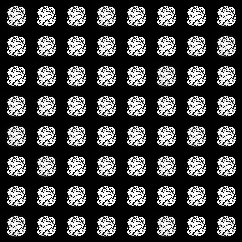



Train Epoch: 2 [0/60000 (0%)]	D Loss: 0.012033
Train Epoch: 2 [0/60000 (0%)]	G Loss: 7.719452
Train Epoch: 2 [12800/60000 (21%)]	D Loss: 0.013014
Train Epoch: 2 [12800/60000 (21%)]	G Loss: 8.395377
Train Epoch: 2 [25600/60000 (43%)]	D Loss: 0.072920
Train Epoch: 2 [25600/60000 (43%)]	G Loss: 6.033433
Train Epoch: 2 [38400/60000 (64%)]	D Loss: 0.035770
Train Epoch: 2 [38400/60000 (64%)]	G Loss: 5.706189
Train Epoch: 2 [51200/60000 (85%)]	D Loss: 0.004367
Train Epoch: 2 [51200/60000 (85%)]	G Loss: 7.179096
====> Epoch: 2 Average loss dis: 0.0250
====> Epoch: 2 Average loss gen: 7.4891
====> Epoch: 2 Average loss dis: 0.0143
====> Epoch: 2 Average loss gen: 7.3759
Sample of generated images


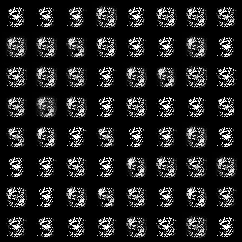



Train Epoch: 3 [0/60000 (0%)]	D Loss: 0.007409
Train Epoch: 3 [0/60000 (0%)]	G Loss: 8.086454
Train Epoch: 3 [12800/60000 (21%)]	D Loss: 0.018647
Train Epoch: 3 [12800/60000 (21%)]	G Loss: 7.899796
Train Epoch: 3 [25600/60000 (43%)]	D Loss: 0.022140
Train Epoch: 3 [25600/60000 (43%)]	G Loss: 9.404728
Train Epoch: 3 [38400/60000 (64%)]	D Loss: 0.003434
Train Epoch: 3 [38400/60000 (64%)]	G Loss: 8.718469
Train Epoch: 3 [51200/60000 (85%)]	D Loss: 0.008351
Train Epoch: 3 [51200/60000 (85%)]	G Loss: 8.483538
====> Epoch: 3 Average loss dis: 0.0202
====> Epoch: 3 Average loss gen: 8.2191
====> Epoch: 3 Average loss dis: 0.0328
====> Epoch: 3 Average loss gen: 6.2329
Sample of generated images


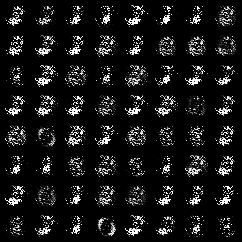



Train Epoch: 4 [0/60000 (0%)]	D Loss: 0.034043
Train Epoch: 4 [0/60000 (0%)]	G Loss: 6.838767
Train Epoch: 4 [12800/60000 (21%)]	D Loss: 0.031095
Train Epoch: 4 [12800/60000 (21%)]	G Loss: 6.357688
Train Epoch: 4 [25600/60000 (43%)]	D Loss: 0.011726
Train Epoch: 4 [25600/60000 (43%)]	G Loss: 6.776344
Train Epoch: 4 [38400/60000 (64%)]	D Loss: 0.011368
Train Epoch: 4 [38400/60000 (64%)]	G Loss: 8.961851
Train Epoch: 4 [51200/60000 (85%)]	D Loss: 0.002977
Train Epoch: 4 [51200/60000 (85%)]	G Loss: 8.156063
====> Epoch: 4 Average loss dis: 0.0195
====> Epoch: 4 Average loss gen: 7.6160
====> Epoch: 4 Average loss dis: 0.0149
====> Epoch: 4 Average loss gen: 6.5702
Sample of generated images


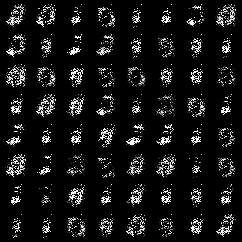



Train Epoch: 5 [0/60000 (0%)]	D Loss: 0.010147
Train Epoch: 5 [0/60000 (0%)]	G Loss: 7.307429
Train Epoch: 5 [12800/60000 (21%)]	D Loss: 0.029784
Train Epoch: 5 [12800/60000 (21%)]	G Loss: 7.753626
Train Epoch: 5 [25600/60000 (43%)]	D Loss: 0.008431
Train Epoch: 5 [25600/60000 (43%)]	G Loss: 8.788667
Train Epoch: 5 [38400/60000 (64%)]	D Loss: 0.008699
Train Epoch: 5 [38400/60000 (64%)]	G Loss: 8.026969
Train Epoch: 5 [51200/60000 (85%)]	D Loss: 0.017292
Train Epoch: 5 [51200/60000 (85%)]	G Loss: 7.295859
====> Epoch: 5 Average loss dis: 0.0190
====> Epoch: 5 Average loss gen: 7.4368
====> Epoch: 5 Average loss dis: 0.0135
====> Epoch: 5 Average loss gen: 6.0246
Sample of generated images


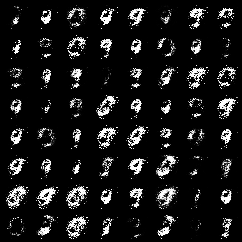



Train Epoch: 6 [0/60000 (0%)]	D Loss: 0.009916
Train Epoch: 6 [0/60000 (0%)]	G Loss: 6.588295
Train Epoch: 6 [12800/60000 (21%)]	D Loss: 0.040016
Train Epoch: 6 [12800/60000 (21%)]	G Loss: 8.337538
Train Epoch: 6 [25600/60000 (43%)]	D Loss: 0.043979
Train Epoch: 6 [25600/60000 (43%)]	G Loss: 7.539875
Train Epoch: 6 [38400/60000 (64%)]	D Loss: 0.042565
Train Epoch: 6 [38400/60000 (64%)]	G Loss: 7.644221
Train Epoch: 6 [51200/60000 (85%)]	D Loss: 0.031126
Train Epoch: 6 [51200/60000 (85%)]	G Loss: 7.533616
====> Epoch: 6 Average loss dis: 0.0296
====> Epoch: 6 Average loss gen: 7.7126
====> Epoch: 6 Average loss dis: 0.0338
====> Epoch: 6 Average loss gen: 8.1078
Sample of generated images


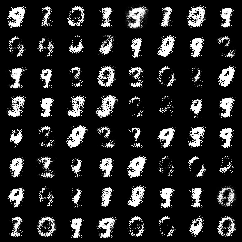



Train Epoch: 7 [0/60000 (0%)]	D Loss: 0.032868
Train Epoch: 7 [0/60000 (0%)]	G Loss: 7.794905
Train Epoch: 7 [12800/60000 (21%)]	D Loss: 0.027609
Train Epoch: 7 [12800/60000 (21%)]	G Loss: 6.963129
Train Epoch: 7 [25600/60000 (43%)]	D Loss: 0.015972
Train Epoch: 7 [25600/60000 (43%)]	G Loss: 7.751232
Train Epoch: 7 [38400/60000 (64%)]	D Loss: 0.033931
Train Epoch: 7 [38400/60000 (64%)]	G Loss: 8.750664
Train Epoch: 7 [51200/60000 (85%)]	D Loss: 0.041421
Train Epoch: 7 [51200/60000 (85%)]	G Loss: 8.882799
====> Epoch: 7 Average loss dis: 0.0486
====> Epoch: 7 Average loss gen: 7.6052
====> Epoch: 7 Average loss dis: 0.0576
====> Epoch: 7 Average loss gen: 6.0915
Sample of generated images


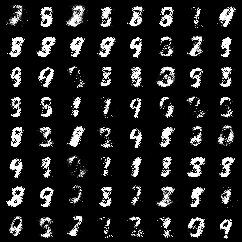



Train Epoch: 8 [0/60000 (0%)]	D Loss: 0.068254
Train Epoch: 8 [0/60000 (0%)]	G Loss: 6.318875
Train Epoch: 8 [12800/60000 (21%)]	D Loss: 0.092080
Train Epoch: 8 [12800/60000 (21%)]	G Loss: 6.356016
Train Epoch: 8 [25600/60000 (43%)]	D Loss: 0.067731
Train Epoch: 8 [25600/60000 (43%)]	G Loss: 6.312993
Train Epoch: 8 [38400/60000 (64%)]	D Loss: 0.051614
Train Epoch: 8 [38400/60000 (64%)]	G Loss: 6.347000
Train Epoch: 8 [51200/60000 (85%)]	D Loss: 0.051931
Train Epoch: 8 [51200/60000 (85%)]	G Loss: 7.598520
====> Epoch: 8 Average loss dis: 0.0681
====> Epoch: 8 Average loss gen: 7.0742
====> Epoch: 8 Average loss dis: 0.1424
====> Epoch: 8 Average loss gen: 8.3519
Sample of generated images


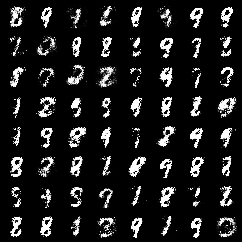



Train Epoch: 9 [0/60000 (0%)]	D Loss: 0.142098
Train Epoch: 9 [0/60000 (0%)]	G Loss: 8.278841
Train Epoch: 9 [12800/60000 (21%)]	D Loss: 0.048462
Train Epoch: 9 [12800/60000 (21%)]	G Loss: 6.311758
Train Epoch: 9 [25600/60000 (43%)]	D Loss: 0.097495
Train Epoch: 9 [25600/60000 (43%)]	G Loss: 5.852087
Train Epoch: 9 [38400/60000 (64%)]	D Loss: 0.068817
Train Epoch: 9 [38400/60000 (64%)]	G Loss: 6.370986
Train Epoch: 9 [51200/60000 (85%)]	D Loss: 0.066829
Train Epoch: 9 [51200/60000 (85%)]	G Loss: 7.715574
====> Epoch: 9 Average loss dis: 0.0770
====> Epoch: 9 Average loss gen: 6.8010
====> Epoch: 9 Average loss dis: 0.0679
====> Epoch: 9 Average loss gen: 5.5881
Sample of generated images


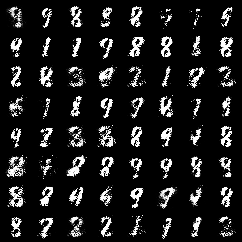



Train Epoch: 10 [0/60000 (0%)]	D Loss: 0.046828
Train Epoch: 10 [0/60000 (0%)]	G Loss: 6.466898
Train Epoch: 10 [12800/60000 (21%)]	D Loss: 0.048665
Train Epoch: 10 [12800/60000 (21%)]	G Loss: 6.137412
Train Epoch: 10 [25600/60000 (43%)]	D Loss: 0.087959
Train Epoch: 10 [25600/60000 (43%)]	G Loss: 6.502592
Train Epoch: 10 [38400/60000 (64%)]	D Loss: 0.068368
Train Epoch: 10 [38400/60000 (64%)]	G Loss: 6.629800
Train Epoch: 10 [51200/60000 (85%)]	D Loss: 0.100609
Train Epoch: 10 [51200/60000 (85%)]	G Loss: 6.145293
====> Epoch: 10 Average loss dis: 0.0807
====> Epoch: 10 Average loss gen: 6.7245
====> Epoch: 10 Average loss dis: 0.0853
====> Epoch: 10 Average loss gen: 5.9104
Sample of generated images


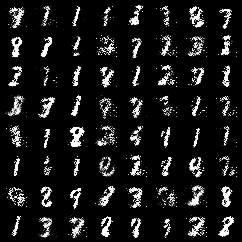



Train Epoch: 11 [0/60000 (0%)]	D Loss: 0.091380
Train Epoch: 11 [0/60000 (0%)]	G Loss: 6.312445
Train Epoch: 11 [12800/60000 (21%)]	D Loss: 0.095038
Train Epoch: 11 [12800/60000 (21%)]	G Loss: 6.352707
Train Epoch: 11 [25600/60000 (43%)]	D Loss: 0.098387
Train Epoch: 11 [25600/60000 (43%)]	G Loss: 7.743305
Train Epoch: 11 [38400/60000 (64%)]	D Loss: 0.109253
Train Epoch: 11 [38400/60000 (64%)]	G Loss: 7.181171
Train Epoch: 11 [51200/60000 (85%)]	D Loss: 0.057367
Train Epoch: 11 [51200/60000 (85%)]	G Loss: 4.894953
====> Epoch: 11 Average loss dis: 0.1184
====> Epoch: 11 Average loss gen: 6.5376
====> Epoch: 11 Average loss dis: 0.1278
====> Epoch: 11 Average loss gen: 5.3811
Sample of generated images


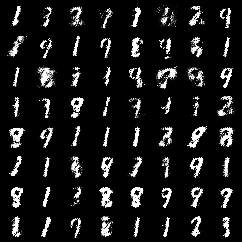



Train Epoch: 12 [0/60000 (0%)]	D Loss: 0.070532
Train Epoch: 12 [0/60000 (0%)]	G Loss: 5.835347
Train Epoch: 12 [12800/60000 (21%)]	D Loss: 0.126055
Train Epoch: 12 [12800/60000 (21%)]	G Loss: 5.553319
Train Epoch: 12 [25600/60000 (43%)]	D Loss: 0.082863
Train Epoch: 12 [25600/60000 (43%)]	G Loss: 5.757480
Train Epoch: 12 [38400/60000 (64%)]	D Loss: 0.114675
Train Epoch: 12 [38400/60000 (64%)]	G Loss: 5.480896
Train Epoch: 12 [51200/60000 (85%)]	D Loss: 0.187571
Train Epoch: 12 [51200/60000 (85%)]	G Loss: 4.571579
====> Epoch: 12 Average loss dis: 0.1531
====> Epoch: 12 Average loss gen: 5.7562
====> Epoch: 12 Average loss dis: 0.1789
====> Epoch: 12 Average loss gen: 4.6938
Sample of generated images


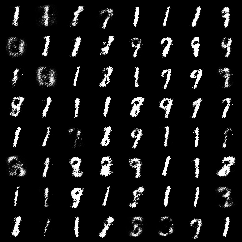



Train Epoch: 13 [0/60000 (0%)]	D Loss: 0.164698
Train Epoch: 13 [0/60000 (0%)]	G Loss: 5.368332
Train Epoch: 13 [12800/60000 (21%)]	D Loss: 0.212577
Train Epoch: 13 [12800/60000 (21%)]	G Loss: 4.380186
Train Epoch: 13 [25600/60000 (43%)]	D Loss: 0.224201
Train Epoch: 13 [25600/60000 (43%)]	G Loss: 5.222670
Train Epoch: 13 [38400/60000 (64%)]	D Loss: 0.192183
Train Epoch: 13 [38400/60000 (64%)]	G Loss: 5.925561
Train Epoch: 13 [51200/60000 (85%)]	D Loss: 0.250139
Train Epoch: 13 [51200/60000 (85%)]	G Loss: 4.796033
====> Epoch: 13 Average loss dis: 0.2252
====> Epoch: 13 Average loss gen: 4.9327
====> Epoch: 13 Average loss dis: 0.2854
====> Epoch: 13 Average loss gen: 3.7387
Sample of generated images


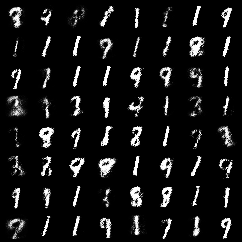



Train Epoch: 14 [0/60000 (0%)]	D Loss: 0.338513
Train Epoch: 14 [0/60000 (0%)]	G Loss: 5.152566
Train Epoch: 14 [12800/60000 (21%)]	D Loss: 0.344349
Train Epoch: 14 [12800/60000 (21%)]	G Loss: 4.233869
Train Epoch: 14 [25600/60000 (43%)]	D Loss: 0.230596
Train Epoch: 14 [25600/60000 (43%)]	G Loss: 4.513427
Train Epoch: 14 [38400/60000 (64%)]	D Loss: 0.247402
Train Epoch: 14 [38400/60000 (64%)]	G Loss: 4.518619
Train Epoch: 14 [51200/60000 (85%)]	D Loss: 0.338691
Train Epoch: 14 [51200/60000 (85%)]	G Loss: 4.062139
====> Epoch: 14 Average loss dis: 0.2829
====> Epoch: 14 Average loss gen: 4.6625
====> Epoch: 14 Average loss dis: 0.3299
====> Epoch: 14 Average loss gen: 4.1346
Sample of generated images


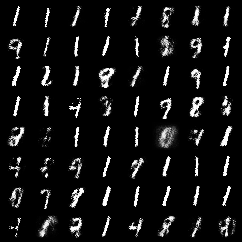



Train Epoch: 15 [0/60000 (0%)]	D Loss: 0.303717
Train Epoch: 15 [0/60000 (0%)]	G Loss: 4.622666
Train Epoch: 15 [12800/60000 (21%)]	D Loss: 0.406588
Train Epoch: 15 [12800/60000 (21%)]	G Loss: 3.996429
Train Epoch: 15 [25600/60000 (43%)]	D Loss: 0.343669
Train Epoch: 15 [25600/60000 (43%)]	G Loss: 4.521920
Train Epoch: 15 [38400/60000 (64%)]	D Loss: 0.240954
Train Epoch: 15 [38400/60000 (64%)]	G Loss: 3.977507
Train Epoch: 15 [51200/60000 (85%)]	D Loss: 0.210034
Train Epoch: 15 [51200/60000 (85%)]	G Loss: 4.232891
====> Epoch: 15 Average loss dis: 0.2946
====> Epoch: 15 Average loss gen: 4.4263
====> Epoch: 15 Average loss dis: 0.3663
====> Epoch: 15 Average loss gen: 3.1848
Sample of generated images


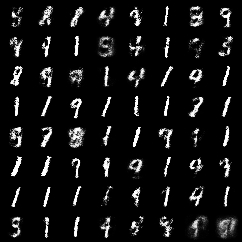



Train Epoch: 16 [0/60000 (0%)]	D Loss: 0.370698
Train Epoch: 16 [0/60000 (0%)]	G Loss: 3.769954
Train Epoch: 16 [12800/60000 (21%)]	D Loss: 0.326950
Train Epoch: 16 [12800/60000 (21%)]	G Loss: 3.873349
Train Epoch: 16 [25600/60000 (43%)]	D Loss: 0.273333
Train Epoch: 16 [25600/60000 (43%)]	G Loss: 4.198727
Train Epoch: 16 [38400/60000 (64%)]	D Loss: 0.247678
Train Epoch: 16 [38400/60000 (64%)]	G Loss: 4.181460
Train Epoch: 16 [51200/60000 (85%)]	D Loss: 0.401640
Train Epoch: 16 [51200/60000 (85%)]	G Loss: 3.981520
====> Epoch: 16 Average loss dis: 0.3260
====> Epoch: 16 Average loss gen: 4.1158
====> Epoch: 16 Average loss dis: 0.4060
====> Epoch: 16 Average loss gen: 3.4442
Sample of generated images


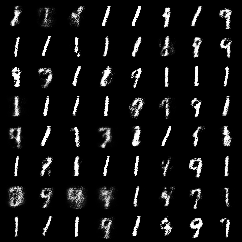



Train Epoch: 17 [0/60000 (0%)]	D Loss: 0.423729
Train Epoch: 17 [0/60000 (0%)]	G Loss: 3.715025
Train Epoch: 17 [12800/60000 (21%)]	D Loss: 0.383087
Train Epoch: 17 [12800/60000 (21%)]	G Loss: 4.439547
Train Epoch: 17 [25600/60000 (43%)]	D Loss: 0.255567
Train Epoch: 17 [25600/60000 (43%)]	G Loss: 4.549350
Train Epoch: 17 [38400/60000 (64%)]	D Loss: 0.446008
Train Epoch: 17 [38400/60000 (64%)]	G Loss: 3.888165
Train Epoch: 17 [51200/60000 (85%)]	D Loss: 0.344537
Train Epoch: 17 [51200/60000 (85%)]	G Loss: 4.867706
====> Epoch: 17 Average loss dis: 0.3602
====> Epoch: 17 Average loss gen: 3.9672
====> Epoch: 17 Average loss dis: 0.3958
====> Epoch: 17 Average loss gen: 3.4197
Sample of generated images


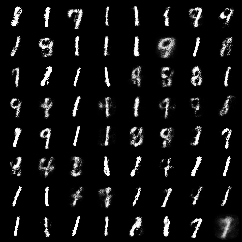



Train Epoch: 18 [0/60000 (0%)]	D Loss: 0.297302
Train Epoch: 18 [0/60000 (0%)]	G Loss: 3.458869
Train Epoch: 18 [12800/60000 (21%)]	D Loss: 0.298710
Train Epoch: 18 [12800/60000 (21%)]	G Loss: 4.213198
Train Epoch: 18 [25600/60000 (43%)]	D Loss: 0.365953
Train Epoch: 18 [25600/60000 (43%)]	G Loss: 3.215870
Train Epoch: 18 [38400/60000 (64%)]	D Loss: 0.419315
Train Epoch: 18 [38400/60000 (64%)]	G Loss: 3.621813
Train Epoch: 18 [51200/60000 (85%)]	D Loss: 0.602540
Train Epoch: 18 [51200/60000 (85%)]	G Loss: 3.649621
====> Epoch: 18 Average loss dis: 0.3815
====> Epoch: 18 Average loss gen: 3.6586
====> Epoch: 18 Average loss dis: 0.4468
====> Epoch: 18 Average loss gen: 3.6713
Sample of generated images


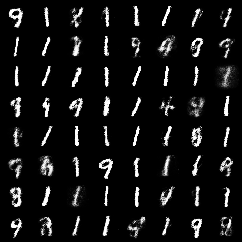



Train Epoch: 19 [0/60000 (0%)]	D Loss: 0.232944
Train Epoch: 19 [0/60000 (0%)]	G Loss: 4.238176
Train Epoch: 19 [12800/60000 (21%)]	D Loss: 0.368172
Train Epoch: 19 [12800/60000 (21%)]	G Loss: 3.156401
Train Epoch: 19 [25600/60000 (43%)]	D Loss: 0.319417
Train Epoch: 19 [25600/60000 (43%)]	G Loss: 3.809383
Train Epoch: 19 [38400/60000 (64%)]	D Loss: 0.377576
Train Epoch: 19 [38400/60000 (64%)]	G Loss: 3.689405
Train Epoch: 19 [51200/60000 (85%)]	D Loss: 0.308937
Train Epoch: 19 [51200/60000 (85%)]	G Loss: 3.818814
====> Epoch: 19 Average loss dis: 0.4016
====> Epoch: 19 Average loss gen: 3.5669
====> Epoch: 19 Average loss dis: 0.4534
====> Epoch: 19 Average loss gen: 2.9682
Sample of generated images


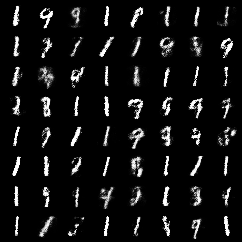



Train Epoch: 20 [0/60000 (0%)]	D Loss: 0.357511
Train Epoch: 20 [0/60000 (0%)]	G Loss: 3.027061
Train Epoch: 20 [12800/60000 (21%)]	D Loss: 0.351005
Train Epoch: 20 [12800/60000 (21%)]	G Loss: 3.392860
Train Epoch: 20 [25600/60000 (43%)]	D Loss: 0.494346
Train Epoch: 20 [25600/60000 (43%)]	G Loss: 3.321528
Train Epoch: 20 [38400/60000 (64%)]	D Loss: 0.434664
Train Epoch: 20 [38400/60000 (64%)]	G Loss: 3.550440
Train Epoch: 20 [51200/60000 (85%)]	D Loss: 0.390850
Train Epoch: 20 [51200/60000 (85%)]	G Loss: 3.721472
====> Epoch: 20 Average loss dis: 0.4149
====> Epoch: 20 Average loss gen: 3.6553
====> Epoch: 20 Average loss dis: 0.4687
====> Epoch: 20 Average loss gen: 3.5754
Sample of generated images


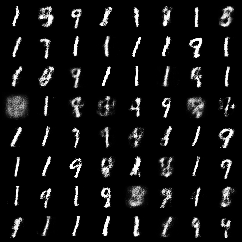



Train Epoch: 21 [0/60000 (0%)]	D Loss: 0.411894
Train Epoch: 21 [0/60000 (0%)]	G Loss: 3.905928
Train Epoch: 21 [12800/60000 (21%)]	D Loss: 0.557839
Train Epoch: 21 [12800/60000 (21%)]	G Loss: 2.874927
Train Epoch: 21 [25600/60000 (43%)]	D Loss: 0.619417
Train Epoch: 21 [25600/60000 (43%)]	G Loss: 3.223426
Train Epoch: 21 [38400/60000 (64%)]	D Loss: 0.330180
Train Epoch: 21 [38400/60000 (64%)]	G Loss: 3.381078
Train Epoch: 21 [51200/60000 (85%)]	D Loss: 0.519073
Train Epoch: 21 [51200/60000 (85%)]	G Loss: 3.054387
====> Epoch: 21 Average loss dis: 0.4230
====> Epoch: 21 Average loss gen: 3.4078
====> Epoch: 21 Average loss dis: 0.4988
====> Epoch: 21 Average loss gen: 3.8795
Sample of generated images


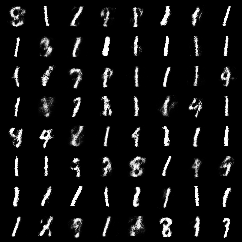



Train Epoch: 22 [0/60000 (0%)]	D Loss: 0.407935
Train Epoch: 22 [0/60000 (0%)]	G Loss: 4.426600
Train Epoch: 22 [12800/60000 (21%)]	D Loss: 0.391815
Train Epoch: 22 [12800/60000 (21%)]	G Loss: 3.182189
Train Epoch: 22 [25600/60000 (43%)]	D Loss: 0.462632
Train Epoch: 22 [25600/60000 (43%)]	G Loss: 2.628225
Train Epoch: 22 [38400/60000 (64%)]	D Loss: 0.405985
Train Epoch: 22 [38400/60000 (64%)]	G Loss: 2.824033
Train Epoch: 22 [51200/60000 (85%)]	D Loss: 0.409462
Train Epoch: 22 [51200/60000 (85%)]	G Loss: 2.973474
====> Epoch: 22 Average loss dis: 0.4335
====> Epoch: 22 Average loss gen: 3.3534
====> Epoch: 22 Average loss dis: 0.4605
====> Epoch: 22 Average loss gen: 2.9196
Sample of generated images


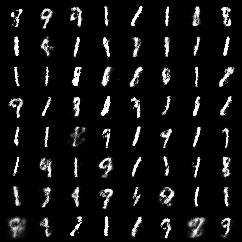



Train Epoch: 23 [0/60000 (0%)]	D Loss: 0.307449
Train Epoch: 23 [0/60000 (0%)]	G Loss: 3.273455
Train Epoch: 23 [12800/60000 (21%)]	D Loss: 0.529147
Train Epoch: 23 [12800/60000 (21%)]	G Loss: 3.532368
Train Epoch: 23 [25600/60000 (43%)]	D Loss: 0.508134
Train Epoch: 23 [25600/60000 (43%)]	G Loss: 2.640924
Train Epoch: 23 [38400/60000 (64%)]	D Loss: 0.448525
Train Epoch: 23 [38400/60000 (64%)]	G Loss: 3.458401
Train Epoch: 23 [51200/60000 (85%)]	D Loss: 0.338099
Train Epoch: 23 [51200/60000 (85%)]	G Loss: 3.009369
====> Epoch: 23 Average loss dis: 0.4294
====> Epoch: 23 Average loss gen: 3.2538
====> Epoch: 23 Average loss dis: 0.4998
====> Epoch: 23 Average loss gen: 2.9713
Sample of generated images


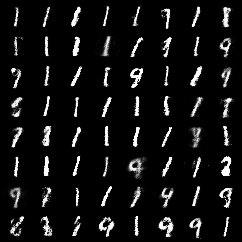



Train Epoch: 24 [0/60000 (0%)]	D Loss: 0.416402
Train Epoch: 24 [0/60000 (0%)]	G Loss: 3.098797
Train Epoch: 24 [12800/60000 (21%)]	D Loss: 0.432346
Train Epoch: 24 [12800/60000 (21%)]	G Loss: 3.366349
Train Epoch: 24 [25600/60000 (43%)]	D Loss: 0.366872
Train Epoch: 24 [25600/60000 (43%)]	G Loss: 3.215036
Train Epoch: 24 [38400/60000 (64%)]	D Loss: 0.385676
Train Epoch: 24 [38400/60000 (64%)]	G Loss: 2.981813
Train Epoch: 24 [51200/60000 (85%)]	D Loss: 0.372212
Train Epoch: 24 [51200/60000 (85%)]	G Loss: 3.103167
====> Epoch: 24 Average loss dis: 0.4376
====> Epoch: 24 Average loss gen: 3.1506
====> Epoch: 24 Average loss dis: 0.5380
====> Epoch: 24 Average loss gen: 2.5034
Sample of generated images


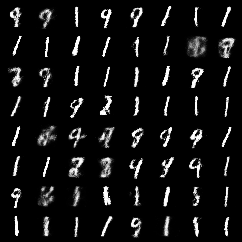



Train Epoch: 25 [0/60000 (0%)]	D Loss: 0.427231
Train Epoch: 25 [0/60000 (0%)]	G Loss: 2.824780
Train Epoch: 25 [12800/60000 (21%)]	D Loss: 0.484813
Train Epoch: 25 [12800/60000 (21%)]	G Loss: 2.761422
Train Epoch: 25 [25600/60000 (43%)]	D Loss: 0.386123
Train Epoch: 25 [25600/60000 (43%)]	G Loss: 2.779247
Train Epoch: 25 [38400/60000 (64%)]	D Loss: 0.406819
Train Epoch: 25 [38400/60000 (64%)]	G Loss: 3.277917
Train Epoch: 25 [51200/60000 (85%)]	D Loss: 0.413908
Train Epoch: 25 [51200/60000 (85%)]	G Loss: 2.836103
====> Epoch: 25 Average loss dis: 0.4330
====> Epoch: 25 Average loss gen: 3.1749
====> Epoch: 25 Average loss dis: 0.4409
====> Epoch: 25 Average loss gen: 3.0204
Sample of generated images


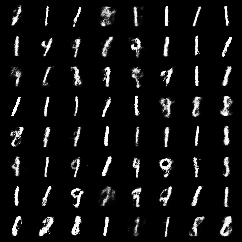



Train Epoch: 26 [0/60000 (0%)]	D Loss: 0.417612
Train Epoch: 26 [0/60000 (0%)]	G Loss: 2.842893
Train Epoch: 26 [12800/60000 (21%)]	D Loss: 0.554539
Train Epoch: 26 [12800/60000 (21%)]	G Loss: 3.163397
Train Epoch: 26 [25600/60000 (43%)]	D Loss: 0.387081
Train Epoch: 26 [25600/60000 (43%)]	G Loss: 2.675668
Train Epoch: 26 [38400/60000 (64%)]	D Loss: 0.556299
Train Epoch: 26 [38400/60000 (64%)]	G Loss: 3.097814
Train Epoch: 26 [51200/60000 (85%)]	D Loss: 0.388302
Train Epoch: 26 [51200/60000 (85%)]	G Loss: 2.817802
====> Epoch: 26 Average loss dis: 0.4427
====> Epoch: 26 Average loss gen: 3.1414
====> Epoch: 26 Average loss dis: 0.4692
====> Epoch: 26 Average loss gen: 3.0715
Sample of generated images


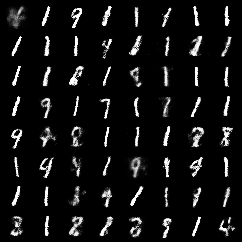



Train Epoch: 27 [0/60000 (0%)]	D Loss: 0.521818
Train Epoch: 27 [0/60000 (0%)]	G Loss: 2.978004
Train Epoch: 27 [12800/60000 (21%)]	D Loss: 0.413046
Train Epoch: 27 [12800/60000 (21%)]	G Loss: 3.078647
Train Epoch: 27 [25600/60000 (43%)]	D Loss: 0.433309
Train Epoch: 27 [25600/60000 (43%)]	G Loss: 3.429255
Train Epoch: 27 [38400/60000 (64%)]	D Loss: 0.469296
Train Epoch: 27 [38400/60000 (64%)]	G Loss: 3.040749
Train Epoch: 27 [51200/60000 (85%)]	D Loss: 0.657068
Train Epoch: 27 [51200/60000 (85%)]	G Loss: 3.259634
====> Epoch: 27 Average loss dis: 0.4499
====> Epoch: 27 Average loss gen: 3.1286
====> Epoch: 27 Average loss dis: 0.6088
====> Epoch: 27 Average loss gen: 3.0989
Sample of generated images


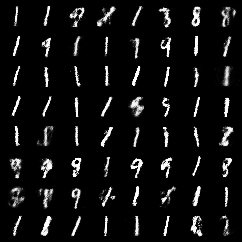



Train Epoch: 28 [0/60000 (0%)]	D Loss: 0.591296
Train Epoch: 28 [0/60000 (0%)]	G Loss: 3.308638
Train Epoch: 28 [12800/60000 (21%)]	D Loss: 0.299133
Train Epoch: 28 [12800/60000 (21%)]	G Loss: 3.473428
Train Epoch: 28 [25600/60000 (43%)]	D Loss: 0.450209
Train Epoch: 28 [25600/60000 (43%)]	G Loss: 3.228072
Train Epoch: 28 [38400/60000 (64%)]	D Loss: 0.596888
Train Epoch: 28 [38400/60000 (64%)]	G Loss: 2.830745
Train Epoch: 28 [51200/60000 (85%)]	D Loss: 0.486606
Train Epoch: 28 [51200/60000 (85%)]	G Loss: 2.943309
====> Epoch: 28 Average loss dis: 0.4523
====> Epoch: 28 Average loss gen: 3.0928
====> Epoch: 28 Average loss dis: 0.4508
====> Epoch: 28 Average loss gen: 3.2406
Sample of generated images


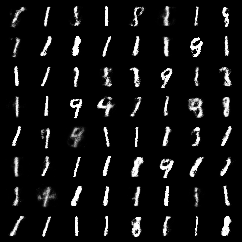



Train Epoch: 29 [0/60000 (0%)]	D Loss: 0.438027
Train Epoch: 29 [0/60000 (0%)]	G Loss: 3.137865
Train Epoch: 29 [12800/60000 (21%)]	D Loss: 0.557089
Train Epoch: 29 [12800/60000 (21%)]	G Loss: 3.455322
Train Epoch: 29 [25600/60000 (43%)]	D Loss: 0.409541
Train Epoch: 29 [25600/60000 (43%)]	G Loss: 2.959158
Train Epoch: 29 [38400/60000 (64%)]	D Loss: 0.550298
Train Epoch: 29 [38400/60000 (64%)]	G Loss: 2.883171
Train Epoch: 29 [51200/60000 (85%)]	D Loss: 0.509796
Train Epoch: 29 [51200/60000 (85%)]	G Loss: 2.686906
====> Epoch: 29 Average loss dis: 0.4550
====> Epoch: 29 Average loss gen: 2.9960
====> Epoch: 29 Average loss dis: 0.5595
====> Epoch: 29 Average loss gen: 2.6529
Sample of generated images


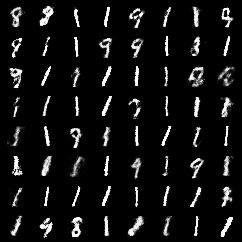



Train Epoch: 30 [0/60000 (0%)]	D Loss: 0.459991
Train Epoch: 30 [0/60000 (0%)]	G Loss: 2.697077
Train Epoch: 30 [12800/60000 (21%)]	D Loss: 0.427327
Train Epoch: 30 [12800/60000 (21%)]	G Loss: 3.202976
Train Epoch: 30 [25600/60000 (43%)]	D Loss: 0.478133
Train Epoch: 30 [25600/60000 (43%)]	G Loss: 3.143345
Train Epoch: 30 [38400/60000 (64%)]	D Loss: 0.344189
Train Epoch: 30 [38400/60000 (64%)]	G Loss: 3.807506
Train Epoch: 30 [51200/60000 (85%)]	D Loss: 0.596327
Train Epoch: 30 [51200/60000 (85%)]	G Loss: 3.036922
====> Epoch: 30 Average loss dis: 0.4622
====> Epoch: 30 Average loss gen: 3.0102
====> Epoch: 30 Average loss dis: 0.6361
====> Epoch: 30 Average loss gen: 2.9916
Sample of generated images


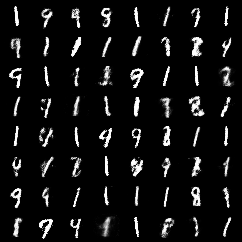



Train Epoch: 31 [0/60000 (0%)]	D Loss: 0.547989
Train Epoch: 31 [0/60000 (0%)]	G Loss: 3.171257
Train Epoch: 31 [12800/60000 (21%)]	D Loss: 0.625423
Train Epoch: 31 [12800/60000 (21%)]	G Loss: 2.583064
Train Epoch: 31 [25600/60000 (43%)]	D Loss: 0.390833
Train Epoch: 31 [25600/60000 (43%)]	G Loss: 2.757237
Train Epoch: 31 [38400/60000 (64%)]	D Loss: 0.594446
Train Epoch: 31 [38400/60000 (64%)]	G Loss: 2.632273
Train Epoch: 31 [51200/60000 (85%)]	D Loss: 0.455681
Train Epoch: 31 [51200/60000 (85%)]	G Loss: 2.528265
====> Epoch: 31 Average loss dis: 0.4541
====> Epoch: 31 Average loss gen: 3.0190
====> Epoch: 31 Average loss dis: 0.5754
====> Epoch: 31 Average loss gen: 2.4840
Sample of generated images


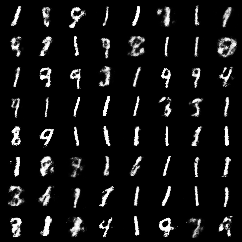



Train Epoch: 32 [0/60000 (0%)]	D Loss: 0.572438
Train Epoch: 32 [0/60000 (0%)]	G Loss: 3.119885
Train Epoch: 32 [12800/60000 (21%)]	D Loss: 0.389901
Train Epoch: 32 [12800/60000 (21%)]	G Loss: 2.943119
Train Epoch: 32 [25600/60000 (43%)]	D Loss: 0.423261
Train Epoch: 32 [25600/60000 (43%)]	G Loss: 2.734330
Train Epoch: 32 [38400/60000 (64%)]	D Loss: 0.395790
Train Epoch: 32 [38400/60000 (64%)]	G Loss: 3.024008
Train Epoch: 32 [51200/60000 (85%)]	D Loss: 0.414237
Train Epoch: 32 [51200/60000 (85%)]	G Loss: 2.783248
====> Epoch: 32 Average loss dis: 0.4562
====> Epoch: 32 Average loss gen: 2.9115
====> Epoch: 32 Average loss dis: 0.5228
====> Epoch: 32 Average loss gen: 2.7956
Sample of generated images


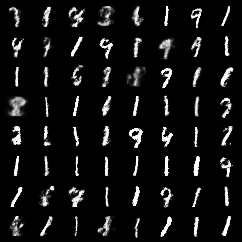



Train Epoch: 33 [0/60000 (0%)]	D Loss: 0.374080
Train Epoch: 33 [0/60000 (0%)]	G Loss: 3.009038
Train Epoch: 33 [12800/60000 (21%)]	D Loss: 0.368432
Train Epoch: 33 [12800/60000 (21%)]	G Loss: 2.966225
Train Epoch: 33 [25600/60000 (43%)]	D Loss: 0.422234
Train Epoch: 33 [25600/60000 (43%)]	G Loss: 2.596405
Train Epoch: 33 [38400/60000 (64%)]	D Loss: 0.625809
Train Epoch: 33 [38400/60000 (64%)]	G Loss: 2.787065
Train Epoch: 33 [51200/60000 (85%)]	D Loss: 0.433602
Train Epoch: 33 [51200/60000 (85%)]	G Loss: 2.782468
====> Epoch: 33 Average loss dis: 0.4509
====> Epoch: 33 Average loss gen: 2.9050
====> Epoch: 33 Average loss dis: 0.4843
====> Epoch: 33 Average loss gen: 2.6740
Sample of generated images


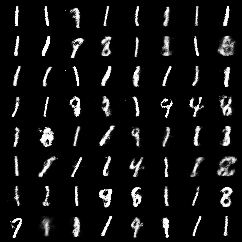



Train Epoch: 34 [0/60000 (0%)]	D Loss: 0.395521
Train Epoch: 34 [0/60000 (0%)]	G Loss: 3.051461
Train Epoch: 34 [12800/60000 (21%)]	D Loss: 0.567565
Train Epoch: 34 [12800/60000 (21%)]	G Loss: 2.873156
Train Epoch: 34 [25600/60000 (43%)]	D Loss: 0.359948
Train Epoch: 34 [25600/60000 (43%)]	G Loss: 3.358000
Train Epoch: 34 [38400/60000 (64%)]	D Loss: 0.556731
Train Epoch: 34 [38400/60000 (64%)]	G Loss: 3.083812
Train Epoch: 34 [51200/60000 (85%)]	D Loss: 0.438835
Train Epoch: 34 [51200/60000 (85%)]	G Loss: 3.161640
====> Epoch: 34 Average loss dis: 0.4504
====> Epoch: 34 Average loss gen: 2.9649
====> Epoch: 34 Average loss dis: 0.4803
====> Epoch: 34 Average loss gen: 3.2888
Sample of generated images


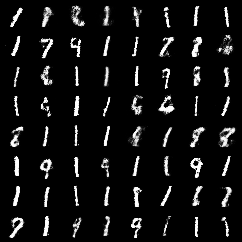



Train Epoch: 35 [0/60000 (0%)]	D Loss: 0.491340
Train Epoch: 35 [0/60000 (0%)]	G Loss: 3.567111
Train Epoch: 35 [12800/60000 (21%)]	D Loss: 0.307549
Train Epoch: 35 [12800/60000 (21%)]	G Loss: 3.169074
Train Epoch: 35 [25600/60000 (43%)]	D Loss: 0.472094
Train Epoch: 35 [25600/60000 (43%)]	G Loss: 3.022834
Train Epoch: 35 [38400/60000 (64%)]	D Loss: 0.386482
Train Epoch: 35 [38400/60000 (64%)]	G Loss: 3.195476
Train Epoch: 35 [51200/60000 (85%)]	D Loss: 0.542617
Train Epoch: 35 [51200/60000 (85%)]	G Loss: 2.775008
====> Epoch: 35 Average loss dis: 0.4548
====> Epoch: 35 Average loss gen: 2.8933
====> Epoch: 35 Average loss dis: 0.5264
====> Epoch: 35 Average loss gen: 3.0955
Sample of generated images


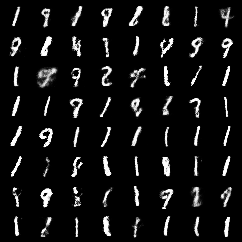



Train Epoch: 36 [0/60000 (0%)]	D Loss: 0.571868
Train Epoch: 36 [0/60000 (0%)]	G Loss: 3.223862
Train Epoch: 36 [12800/60000 (21%)]	D Loss: 0.380695
Train Epoch: 36 [12800/60000 (21%)]	G Loss: 3.120324
Train Epoch: 36 [25600/60000 (43%)]	D Loss: 0.365936
Train Epoch: 36 [25600/60000 (43%)]	G Loss: 3.171640
Train Epoch: 36 [38400/60000 (64%)]	D Loss: 0.515560
Train Epoch: 36 [38400/60000 (64%)]	G Loss: 2.948387
Train Epoch: 36 [51200/60000 (85%)]	D Loss: 0.548942
Train Epoch: 36 [51200/60000 (85%)]	G Loss: 2.911320
====> Epoch: 36 Average loss dis: 0.4523
====> Epoch: 36 Average loss gen: 2.8648
====> Epoch: 36 Average loss dis: 0.5203
====> Epoch: 36 Average loss gen: 3.0277
Sample of generated images


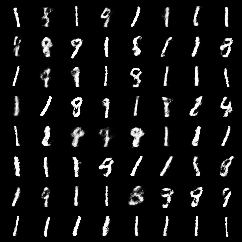



Train Epoch: 37 [0/60000 (0%)]	D Loss: 0.417078
Train Epoch: 37 [0/60000 (0%)]	G Loss: 3.542801
Train Epoch: 37 [12800/60000 (21%)]	D Loss: 0.369597
Train Epoch: 37 [12800/60000 (21%)]	G Loss: 3.215626
Train Epoch: 37 [25600/60000 (43%)]	D Loss: 0.489197
Train Epoch: 37 [25600/60000 (43%)]	G Loss: 3.099490
Train Epoch: 37 [38400/60000 (64%)]	D Loss: 0.459905
Train Epoch: 37 [38400/60000 (64%)]	G Loss: 2.290377
Train Epoch: 37 [51200/60000 (85%)]	D Loss: 0.345610
Train Epoch: 37 [51200/60000 (85%)]	G Loss: 2.725863
====> Epoch: 37 Average loss dis: 0.4571
====> Epoch: 37 Average loss gen: 2.8290
====> Epoch: 37 Average loss dis: 0.5301
====> Epoch: 37 Average loss gen: 2.8701
Sample of generated images


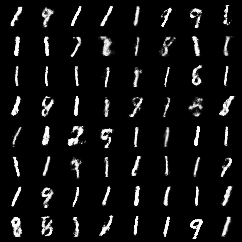



Train Epoch: 38 [0/60000 (0%)]	D Loss: 0.588333
Train Epoch: 38 [0/60000 (0%)]	G Loss: 3.192734
Train Epoch: 38 [12800/60000 (21%)]	D Loss: 0.455346
Train Epoch: 38 [12800/60000 (21%)]	G Loss: 2.621098
Train Epoch: 38 [25600/60000 (43%)]	D Loss: 0.478543
Train Epoch: 38 [25600/60000 (43%)]	G Loss: 2.533836
Train Epoch: 38 [38400/60000 (64%)]	D Loss: 0.453651
Train Epoch: 38 [38400/60000 (64%)]	G Loss: 3.028479
Train Epoch: 38 [51200/60000 (85%)]	D Loss: 0.567583
Train Epoch: 38 [51200/60000 (85%)]	G Loss: 2.479160
====> Epoch: 38 Average loss dis: 0.4629
====> Epoch: 38 Average loss gen: 2.7782
====> Epoch: 38 Average loss dis: 0.4847
====> Epoch: 38 Average loss gen: 2.7798
Sample of generated images


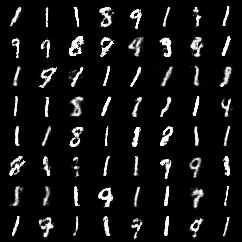



Train Epoch: 39 [0/60000 (0%)]	D Loss: 0.442121
Train Epoch: 39 [0/60000 (0%)]	G Loss: 2.805596
Train Epoch: 39 [12800/60000 (21%)]	D Loss: 0.474140
Train Epoch: 39 [12800/60000 (21%)]	G Loss: 2.391740
Train Epoch: 39 [25600/60000 (43%)]	D Loss: 0.616724
Train Epoch: 39 [25600/60000 (43%)]	G Loss: 2.899610
Train Epoch: 39 [38400/60000 (64%)]	D Loss: 0.451285
Train Epoch: 39 [38400/60000 (64%)]	G Loss: 2.590488
Train Epoch: 39 [51200/60000 (85%)]	D Loss: 0.462670
Train Epoch: 39 [51200/60000 (85%)]	G Loss: 2.592397
====> Epoch: 39 Average loss dis: 0.4646
====> Epoch: 39 Average loss gen: 2.7564
====> Epoch: 39 Average loss dis: 0.5437
====> Epoch: 39 Average loss gen: 2.7603
Sample of generated images


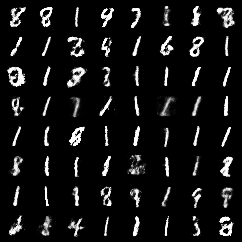



Train Epoch: 40 [0/60000 (0%)]	D Loss: 0.372208
Train Epoch: 40 [0/60000 (0%)]	G Loss: 2.784196
Train Epoch: 40 [12800/60000 (21%)]	D Loss: 0.492647
Train Epoch: 40 [12800/60000 (21%)]	G Loss: 2.673916
Train Epoch: 40 [25600/60000 (43%)]	D Loss: 0.294234
Train Epoch: 40 [25600/60000 (43%)]	G Loss: 3.050723
Train Epoch: 40 [38400/60000 (64%)]	D Loss: 0.450115
Train Epoch: 40 [38400/60000 (64%)]	G Loss: 2.722708
Train Epoch: 40 [51200/60000 (85%)]	D Loss: 0.466249
Train Epoch: 40 [51200/60000 (85%)]	G Loss: 2.902205
====> Epoch: 40 Average loss dis: 0.4579
====> Epoch: 40 Average loss gen: 2.7953
====> Epoch: 40 Average loss dis: 0.5756
====> Epoch: 40 Average loss gen: 2.3879
Sample of generated images


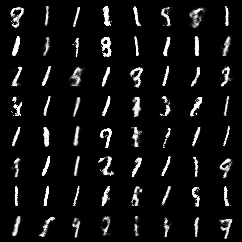



Train Epoch: 41 [0/60000 (0%)]	D Loss: 0.550447
Train Epoch: 41 [0/60000 (0%)]	G Loss: 2.727216
Train Epoch: 41 [12800/60000 (21%)]	D Loss: 0.587316
Train Epoch: 41 [12800/60000 (21%)]	G Loss: 2.627687
Train Epoch: 41 [25600/60000 (43%)]	D Loss: 0.477879
Train Epoch: 41 [25600/60000 (43%)]	G Loss: 2.941200
Train Epoch: 41 [38400/60000 (64%)]	D Loss: 0.443529
Train Epoch: 41 [38400/60000 (64%)]	G Loss: 2.768065
Train Epoch: 41 [51200/60000 (85%)]	D Loss: 0.507656
Train Epoch: 41 [51200/60000 (85%)]	G Loss: 2.761950
====> Epoch: 41 Average loss dis: 0.4594
====> Epoch: 41 Average loss gen: 2.7833
====> Epoch: 41 Average loss dis: 0.4941
====> Epoch: 41 Average loss gen: 2.7663
Sample of generated images


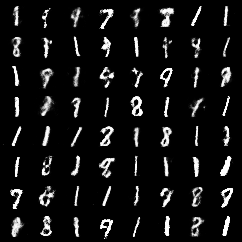



Train Epoch: 42 [0/60000 (0%)]	D Loss: 0.413193
Train Epoch: 42 [0/60000 (0%)]	G Loss: 2.756553
Train Epoch: 42 [12800/60000 (21%)]	D Loss: 0.504746
Train Epoch: 42 [12800/60000 (21%)]	G Loss: 2.973650
Train Epoch: 42 [25600/60000 (43%)]	D Loss: 0.428353
Train Epoch: 42 [25600/60000 (43%)]	G Loss: 2.704853
Train Epoch: 42 [38400/60000 (64%)]	D Loss: 0.392554
Train Epoch: 42 [38400/60000 (64%)]	G Loss: 2.970119
Train Epoch: 42 [51200/60000 (85%)]	D Loss: 0.353736
Train Epoch: 42 [51200/60000 (85%)]	G Loss: 2.849945
====> Epoch: 42 Average loss dis: 0.4589
====> Epoch: 42 Average loss gen: 2.7905
====> Epoch: 42 Average loss dis: 0.5499
====> Epoch: 42 Average loss gen: 2.4797
Sample of generated images


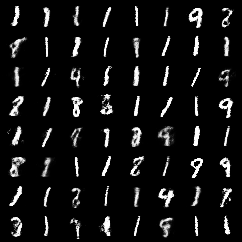



Train Epoch: 43 [0/60000 (0%)]	D Loss: 0.509998
Train Epoch: 43 [0/60000 (0%)]	G Loss: 2.760473
Train Epoch: 43 [12800/60000 (21%)]	D Loss: 0.372051
Train Epoch: 43 [12800/60000 (21%)]	G Loss: 2.638342
Train Epoch: 43 [25600/60000 (43%)]	D Loss: 0.494170
Train Epoch: 43 [25600/60000 (43%)]	G Loss: 2.550320
Train Epoch: 43 [38400/60000 (64%)]	D Loss: 0.335943
Train Epoch: 43 [38400/60000 (64%)]	G Loss: 2.678424
Train Epoch: 43 [51200/60000 (85%)]	D Loss: 0.511535
Train Epoch: 43 [51200/60000 (85%)]	G Loss: 2.795369
====> Epoch: 43 Average loss dis: 0.4544
====> Epoch: 43 Average loss gen: 2.7904
====> Epoch: 43 Average loss dis: 0.4623
====> Epoch: 43 Average loss gen: 2.8237
Sample of generated images


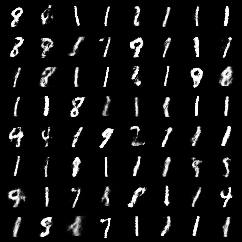



Train Epoch: 44 [0/60000 (0%)]	D Loss: 0.317521
Train Epoch: 44 [0/60000 (0%)]	G Loss: 2.820694
Train Epoch: 44 [12800/60000 (21%)]	D Loss: 0.461389
Train Epoch: 44 [12800/60000 (21%)]	G Loss: 2.563987
Train Epoch: 44 [25600/60000 (43%)]	D Loss: 0.429634
Train Epoch: 44 [25600/60000 (43%)]	G Loss: 2.733652
Train Epoch: 44 [38400/60000 (64%)]	D Loss: 0.357216
Train Epoch: 44 [38400/60000 (64%)]	G Loss: 2.485374
Train Epoch: 44 [51200/60000 (85%)]	D Loss: 0.521662
Train Epoch: 44 [51200/60000 (85%)]	G Loss: 2.360403
====> Epoch: 44 Average loss dis: 0.4607
====> Epoch: 44 Average loss gen: 2.7910
====> Epoch: 44 Average loss dis: 0.5086
====> Epoch: 44 Average loss gen: 2.5554
Sample of generated images


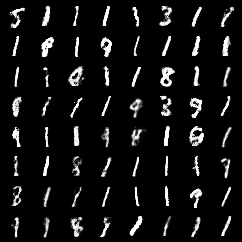



Train Epoch: 45 [0/60000 (0%)]	D Loss: 0.346276
Train Epoch: 45 [0/60000 (0%)]	G Loss: 2.582163
Train Epoch: 45 [12800/60000 (21%)]	D Loss: 0.526796
Train Epoch: 45 [12800/60000 (21%)]	G Loss: 2.753038
Train Epoch: 45 [25600/60000 (43%)]	D Loss: 0.474819
Train Epoch: 45 [25600/60000 (43%)]	G Loss: 2.626207
Train Epoch: 45 [38400/60000 (64%)]	D Loss: 0.526568
Train Epoch: 45 [38400/60000 (64%)]	G Loss: 2.825638
Train Epoch: 45 [51200/60000 (85%)]	D Loss: 0.607276
Train Epoch: 45 [51200/60000 (85%)]	G Loss: 2.678942
====> Epoch: 45 Average loss dis: 0.4606
====> Epoch: 45 Average loss gen: 2.7379
====> Epoch: 45 Average loss dis: 0.5578
====> Epoch: 45 Average loss gen: 2.5992
Sample of generated images


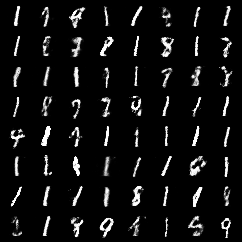



Train Epoch: 46 [0/60000 (0%)]	D Loss: 0.378494
Train Epoch: 46 [0/60000 (0%)]	G Loss: 2.720034
Train Epoch: 46 [12800/60000 (21%)]	D Loss: 0.339079
Train Epoch: 46 [12800/60000 (21%)]	G Loss: 2.838593
Train Epoch: 46 [25600/60000 (43%)]	D Loss: 0.552706
Train Epoch: 46 [25600/60000 (43%)]	G Loss: 2.605070
Train Epoch: 46 [38400/60000 (64%)]	D Loss: 0.361215
Train Epoch: 46 [38400/60000 (64%)]	G Loss: 2.740434
Train Epoch: 46 [51200/60000 (85%)]	D Loss: 0.402545
Train Epoch: 46 [51200/60000 (85%)]	G Loss: 2.971140
====> Epoch: 46 Average loss dis: 0.4580
====> Epoch: 46 Average loss gen: 2.7855
====> Epoch: 46 Average loss dis: 0.4829
====> Epoch: 46 Average loss gen: 2.9456
Sample of generated images


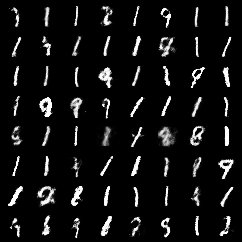



Train Epoch: 47 [0/60000 (0%)]	D Loss: 0.501998
Train Epoch: 47 [0/60000 (0%)]	G Loss: 2.791487
Train Epoch: 47 [12800/60000 (21%)]	D Loss: 0.376977
Train Epoch: 47 [12800/60000 (21%)]	G Loss: 2.716125
Train Epoch: 47 [25600/60000 (43%)]	D Loss: 0.526385
Train Epoch: 47 [25600/60000 (43%)]	G Loss: 2.632760
Train Epoch: 47 [38400/60000 (64%)]	D Loss: 0.348888
Train Epoch: 47 [38400/60000 (64%)]	G Loss: 3.229277
Train Epoch: 47 [51200/60000 (85%)]	D Loss: 0.457773
Train Epoch: 47 [51200/60000 (85%)]	G Loss: 2.655793
====> Epoch: 47 Average loss dis: 0.4542
====> Epoch: 47 Average loss gen: 2.8020
====> Epoch: 47 Average loss dis: 0.5177
====> Epoch: 47 Average loss gen: 2.6582
Sample of generated images


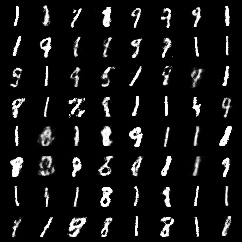



Train Epoch: 48 [0/60000 (0%)]	D Loss: 0.502905
Train Epoch: 48 [0/60000 (0%)]	G Loss: 2.838341
Train Epoch: 48 [12800/60000 (21%)]	D Loss: 0.425493
Train Epoch: 48 [12800/60000 (21%)]	G Loss: 2.535258
Train Epoch: 48 [25600/60000 (43%)]	D Loss: 0.446216
Train Epoch: 48 [25600/60000 (43%)]	G Loss: 2.859837
Train Epoch: 48 [38400/60000 (64%)]	D Loss: 0.435766
Train Epoch: 48 [38400/60000 (64%)]	G Loss: 2.728551
Train Epoch: 48 [51200/60000 (85%)]	D Loss: 0.518255
Train Epoch: 48 [51200/60000 (85%)]	G Loss: 2.468362
====> Epoch: 48 Average loss dis: 0.4566
====> Epoch: 48 Average loss gen: 2.8128
====> Epoch: 48 Average loss dis: 0.5122
====> Epoch: 48 Average loss gen: 2.5211
Sample of generated images


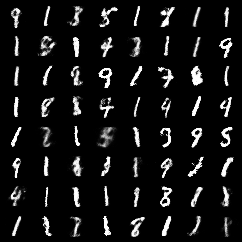



Train Epoch: 49 [0/60000 (0%)]	D Loss: 0.491160
Train Epoch: 49 [0/60000 (0%)]	G Loss: 2.516820
Train Epoch: 49 [12800/60000 (21%)]	D Loss: 0.469434
Train Epoch: 49 [12800/60000 (21%)]	G Loss: 2.472178
Train Epoch: 49 [25600/60000 (43%)]	D Loss: 0.348925
Train Epoch: 49 [25600/60000 (43%)]	G Loss: 2.568165
Train Epoch: 49 [38400/60000 (64%)]	D Loss: 0.518963
Train Epoch: 49 [38400/60000 (64%)]	G Loss: 2.974399
Train Epoch: 49 [51200/60000 (85%)]	D Loss: 0.537883
Train Epoch: 49 [51200/60000 (85%)]	G Loss: 2.578466
====> Epoch: 49 Average loss dis: 0.4530
====> Epoch: 49 Average loss gen: 2.7673
====> Epoch: 49 Average loss dis: 0.4788
====> Epoch: 49 Average loss gen: 2.7657
Sample of generated images


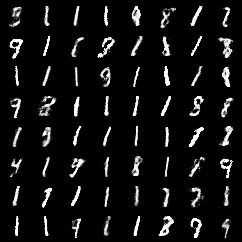



Train Epoch: 50 [0/60000 (0%)]	D Loss: 0.440484
Train Epoch: 50 [0/60000 (0%)]	G Loss: 3.100391
Train Epoch: 50 [12800/60000 (21%)]	D Loss: 0.599360
Train Epoch: 50 [12800/60000 (21%)]	G Loss: 2.636312
Train Epoch: 50 [25600/60000 (43%)]	D Loss: 0.490727
Train Epoch: 50 [25600/60000 (43%)]	G Loss: 2.576679
Train Epoch: 50 [38400/60000 (64%)]	D Loss: 0.451590
Train Epoch: 50 [38400/60000 (64%)]	G Loss: 2.699328
Train Epoch: 50 [51200/60000 (85%)]	D Loss: 0.314279
Train Epoch: 50 [51200/60000 (85%)]	G Loss: 2.636363
====> Epoch: 50 Average loss dis: 0.4569
====> Epoch: 50 Average loss gen: 2.7215
====> Epoch: 50 Average loss dis: 0.5000
====> Epoch: 50 Average loss gen: 2.8468
Sample of generated images


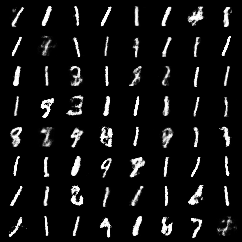

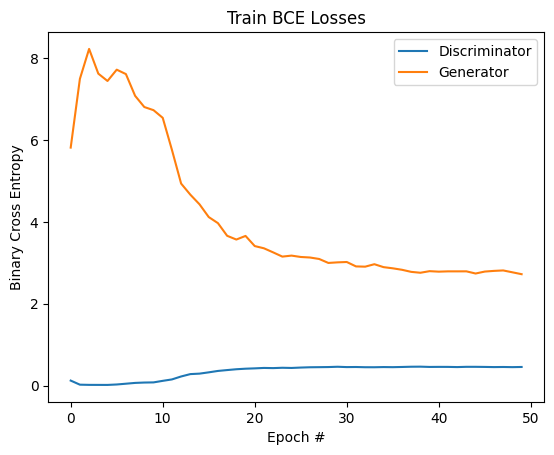

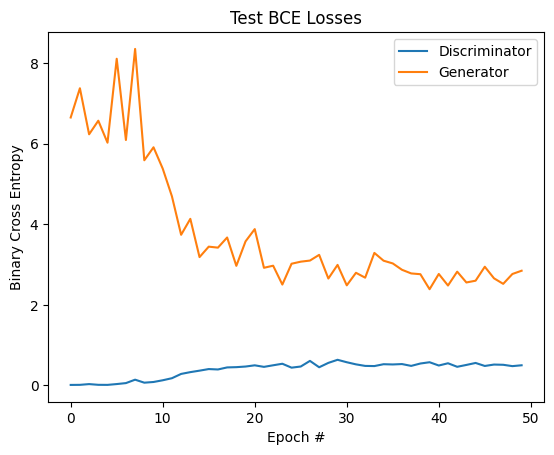

In [6]:
# train and test gan
epochs = 50
discriminator_average_train_losses = []
discriminator_average_test_losses = []
generator_average_train_losses = []
generator_average_test_losses = []
generator_model = Generator().to(device)
generator_optimizer = optim.Adam(generator_model.parameters(), lr=1e-3)
discriminator_model = Discriminator().to(device)
discriminator_optimizer = optim.Adam(discriminator_model.parameters(), lr=1e-3)

for epoch in range(1, epochs + 1):
    generator_average_train_loss, discriminator_average_train_loss = gan_train(epoch, generator_model, generator_optimizer, discriminator_model, discriminator_optimizer)
    discriminator_average_train_losses.append(discriminator_average_train_loss)
    generator_average_train_losses.append(generator_average_train_loss)
    generator_average_test_loss, discriminator_average_test_loss = gan_test(epoch, generator_model, discriminator_model)
    discriminator_average_test_losses.append(discriminator_average_test_loss)
    generator_average_test_losses.append(generator_average_test_loss)
    with torch.no_grad():
        sample = torch.randn(64, 20).to(device)
        sample = generator_model(sample).cpu()
        save_image(sample.view(64, 1, 28, 28),
                   'results/sample_' + str(epoch) + '.png')
        print('Sample of generated images')
        display(Image('results/sample_' + str(epoch) + '.png'))
        print('\n')

# Plot Train losses
plt.plot(discriminator_average_train_losses)
plt.plot(generator_average_train_losses)
plt.title('Train BCE Losses')
plt.ylabel('Binary Cross Entropy')
plt.xlabel('Epoch #')
plt.legend(['Discriminator','Generator'], loc='upper right')
plt.show()

# Plot Test Losses
plt.plot(discriminator_average_test_losses)
plt.plot(generator_average_test_losses)
plt.title('Test BCE Losses')
plt.ylabel('Binary Cross Entropy')
plt.xlabel('Epoch #')
plt.legend(['Discriminator','Generator'], loc='upper right')
plt.show()


## Explanation


What GAN does is very different that what the VAE does.
Training with GAN, has two steps:

First, we train the discriminator. We pass real images from the training set and letting know the discriminator these are real(by passing labels as 1). The loss calculated in this step makes the first part of the objective function.
Then, we pass images generated by the generator (sampled from the normal distribution) and letting the discriminator know that these are fake. The loss calculated in this step makes the second part of the objective function. Then we backpropagate the loss and update the discriminator.

Next, it's time to fool the discriminator. We pass images generated by the generator (sampled from the normal distribution) but tell the discriminator know that these are real. We calculate the loss and update the generator. 
This updating happens recursively between the generator and the discriminator until training is finished. The goal is that discriminator to be only 50 percent sure of its vote.
As seen by the plots, at first the generator has a hard time in generating acceptable images, and the discriminator is very successful in distinguishing between fake and real. As training happens, the BCE for the discriminator increases, meaning its less certain about what's fake and what's real, and at the same time the generator gets better at fooling the discriminator.

Since the digit "1" is a straight line, it's easier for the generator to generate them and harder for the discriminator to distinguish between fake and real. As the generator sees producing ones decrease it's loss, it continues to generate more and more ones.

The quality of the images generated by GAN are better than the quality of the images generated by the VAE, because the generator in GAN is designed to generate more realistic images and gets feeback from the discriminator in an adversarial manner. In contrast, VAE is designed to generate images by learning a probabilistic distribution of the input data. It doesn't know it is supposed generate images very close to the real ones. 

Furthurmore, GANs can model more complex data and prone to overfitting, where VAEs should be used to learn simpler distributions. GANs have a higher computational complexity, so it takes longer to train, but training VAEs is relatively faster. 
If we can control the number of ones generated by the GAN, they can be used to generate high quality real-like images from noise. 